In [1]:
import numpy as np
from collections import deque

# initialize M with M elements of shape (1,2)
M = np.random.randint(0,100,(100,1,2))
print(M)

start_center = np.random.randint(M.shape[0])
centers = [M[start_center]]
nc = deque()
for i in range(len(M)):
  if i == start_center:
    continue
  nc.append(i)


weights = np.zeros(len(nc))
D = lambda k,m: np.sqrt(np.sum(np.array([np.power(i,2) for i in (k - m).flatten()])))
for idx, mdx in enumerate(nc):
  m = M[mdx]
  min_dist = float('inf')
  for k in centers:
    min_dist = min(min_dist, D(k,m))
  weights[idx] = np.power(min_dist,2)


def weighted_sample(weights):
  total_w = weights / np.sum(weights)
  sample_val = np.random.uniform(0,1)
  for idx, w in enumerate(total_w):
    sample_val -= w
    if sample_val <= 0:
      return idx
  return len(weights) - 1

print(weighted_sample(weights))

selected_point = weighted_sample(weights)
centers.append(M[nc[selected_point]])
nc.remove(nc[selected_point])

Overwriting kmeanspp.py


In [6]:
print(centers)

[array([[45, 18]]), array([[98, 80]])]


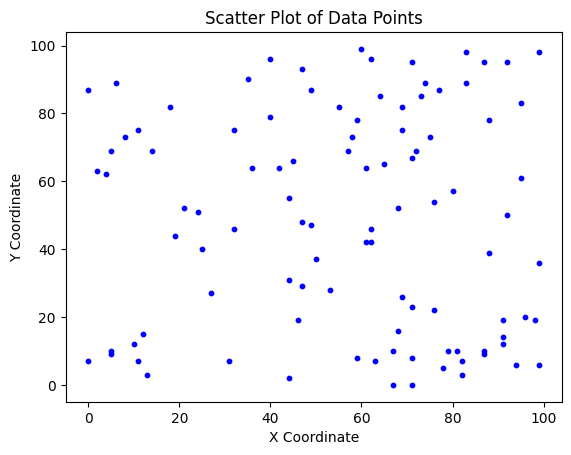

In [4]:
import matplotlib.pyplot as plt

# Reshape the array to (100, 2) for plotting
reshaped_data = M.reshape(-1, 2)

# Extract x and y coordinates
x_coords = reshaped_data[:, 0]
y_coords = reshaped_data[:, 1]

# Create a scatter plot
plt.scatter(x_coords, y_coords, marker='o', color='b', s=10)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Data Points')

# Display the plot
plt.show()